## Artificial Intelligence in Business Analysis

### Homework 1

Data Touring 2 내의 Sunspots, Trees, iris data에 대해 python 코드로 구현합니다

#### import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

#### Sunspots

In [2]:
sunspots = get_rdataset('sunspots').data
sunspots.head()

,time,value
0,1749.000000,58.0
1,1749.083333,62.6
2,1749.166667,70.0
3,1749.250000,55.7
4,1749.333333,85.0


In [3]:
def myPlot(index : pd.Series, 
           data : pd.Series, 
           title : str, 
           xlabel : str, 
           ylabel : str) -> plt.plot :
    fig, ax = plt.subplots(figsize = (10, 4))
    ax.scatter(x = index, y = data, marker = '.', color = 'k', label = 'Observed')
    ax.legend()
    ax.grid(False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize = 12, fontfamily = 'Serif')
    return ax

def main() -> None : 
    myPlot(index = sunspots.time,
           data = sunspots.value,
           title = 'Sunspots Data',
           xlabel = 'time(year)',
           ylabel = 'monthly average no sunspots')

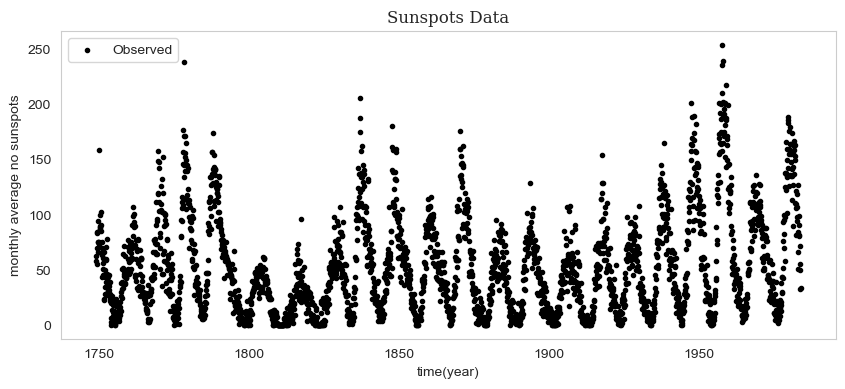

In [4]:
if __name__ == '__main__' : main()

***LOESS Smoothing***

In [5]:
import statsmodels.api as sm
loess = sm.nonparametric.lowess(sunspots.value, np.arange(len(sunspots)), frac = 36 / len(sunspots)) # frac based on Lecture notes
loess = pd.DataFrame(loess[:,1], columns = ['LOESS'], index = sunspots.time)

In [6]:
def main() -> None : 
    myPlot(index = sunspots.time,
           data = sunspots.value,
           title = 'Sunspots Data',
           xlabel = 'time(year)',
           ylabel = 'monthly average no sunspots');
    plt.plot(loess, color = 'red') # loess regression

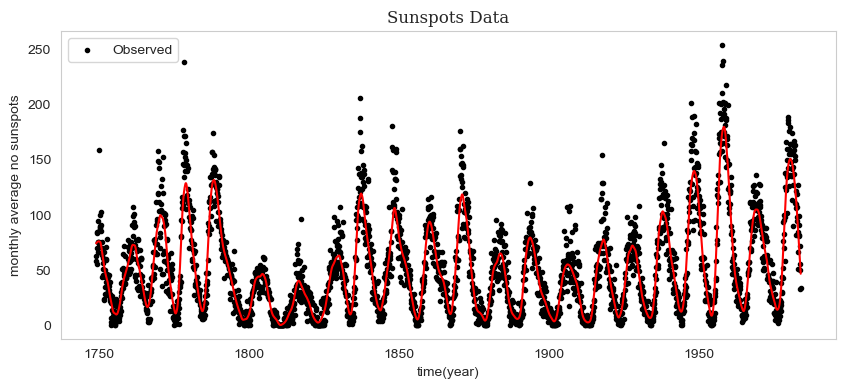

In [7]:
if __name__ == '__main__' : main()

### Trees Data

체리나무 31그루에 대하여, Girth, Heights, Volume 세 변수를 측정한 자료이다

In [8]:
trees = get_rdataset('trees').data
trees.head(5)

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


***pair plots***

In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')
def myPairPlot(data : pd.DataFrame) -> plt.plot :
    graph = sns.pairplot(data, 
                         diag_kind = "kde", 
                         markers = ".", 
                         kind = "reg", 
                         diag_kws = {'bw_method': 0.2})
    for i, j in zip(*plt.np.triu_indices_from(graph.axes, 1)) :
        graph.axes[i, j].set_visible(False)
    return

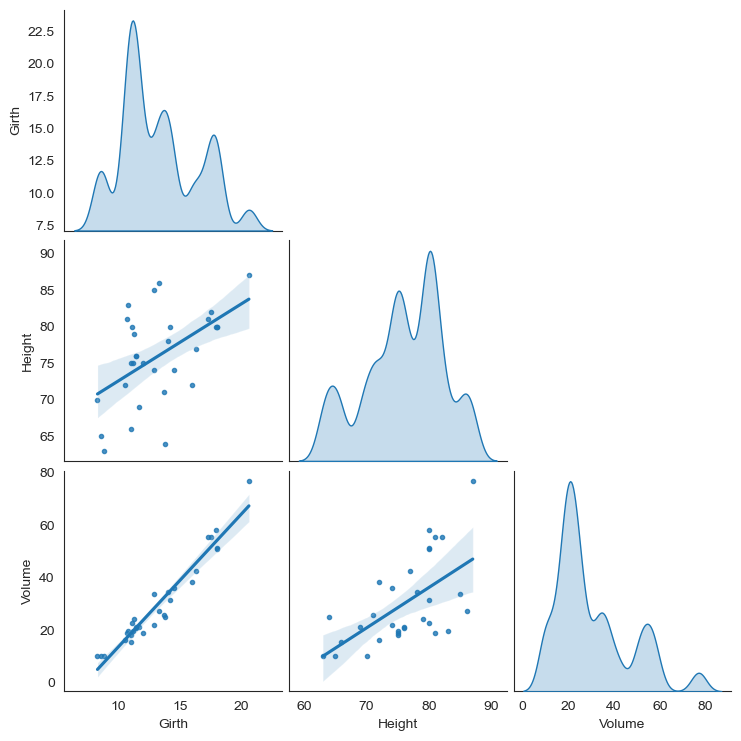

In [10]:
if __name__ == '__main__' : myPairPlot(trees)

***Multivariate Adaptive Regression Splines***

pyEarth를 사용

#### Iris Data

In [11]:
iris = get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


terminal에서 다음과 같이 입력하면 web app으로 plotting이 가능합니다

```{python}
python3 {file_path}/iris_plotly.py
```

In [25]:
import plotly.express as px
import plotly.graph_objects as go

In [27]:
fig = px.scatter_3d(iris,
                    x = 'Sepal.Width',
                    y = 'Sepal.Length',
                    z = 'Petal.Length',
                    color = 'Species',
                    opacity = 0.7)
fig.show(marker = '.')

***Spline smoothing***

`sklearn.preprocessing` 모듈에서 `PolynomialFeatures` class를 사용하면 평면 추정이 가능합니다

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial = PolynomialFeatures(degree = 2)
X_poly = polynomial.fit_transform(iris[['Sepal.Width','Sepal.Length']])
model = LinearRegression().fit(X_poly, iris['Petal.Length'])

In [45]:
sepal_width_range = np.linspace(iris['Sepal.Width'].min(), iris['Sepal.Width'].max(), 100)
sepal_length_range = np.linspace(iris['Sepal.Length'].min(), iris['Sepal.Length'].max(), 100)
sepal_width_values, sepal_length_values = np.meshgrid(sepal_width_range, sepal_length_range)
X_plot = np.column_stack((sepal_width_values.ravel(), sepal_length_values.ravel()))
X_plot_poly = polynomial.transform(X_plot)
predicted_values = model.predict(X_plot_poly)

fig = go.Figure(data = [go.Surface(z = predicted_values.reshape(sepal_width_values.shape),
                                   x = sepal_width_values,
                                   y = sepal_length_values)])

fig.update_layout(title = 'Predicted Petal Length Surface',
                  scene = dict(xaxis_title = 'Sepal Width',
                               yaxis_title = 'Sepal Length',
                               zaxis_title = 'Petal Length'))

In [47]:
scatter_fig = px.scatter_3d(iris,
                            x = 'Sepal.Width',
                            y = 'Sepal.Length',
                            z = 'Petal.Length',
                            color = 'Petal.Length',
                            opacity = 0.7)
scatter_data = scatter_fig.data[0]

surface_fig = go.Figure(data = [go.Surface(z = predicted_values.reshape(sepal_width_values.shape),
                                           x = sepal_width_values,
                                           y = sepal_length_values)])
surface_data = surface_fig.data[0]

combined_fig = go.Figure(data = [scatter_data, surface_data])
combined_fig.update_layout(title = 'Combined 3D Plot',
                           scene = dict(xaxis_title = 'Sepal Width',
                                        yaxis_title = 'Sepal Length',
                                        zaxis_title = 'Petal Length'))

combined_fig.show()

***iris data with Classification***

classification은 가장 유명한 모형인 RandomForest Classifier를 사용하여 수행하였습니다

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
iris['label'] = LabelEncoder().fit_transform(iris['Species'])

classifier = RandomForestClassifier(n_estimators = 1000,
                                    criterion = 'entropy',
                                    random_state = 42,
                                    class_weight = 'balanced_subsample',
                                    ccp_alpha = 0.001,
                                    min_weight_fraction_leaf = 0.05,
                                    max_features = 10)

fit_classifier = classifier.fit(iris[['Sepal.Width','Sepal.Length']], iris['label'])

In [109]:
x_min, x_max = iris['Sepal.Width'].min() - 1, iris['Sepal.Width'].max() + 1
y_min, y_max = iris['Sepal.Length'].min() - 1, iris['Sepal.Length'].max() + 1
_x, _y = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [110]:
_z = classifier.predict(np.c_[_x.ravel(), _y.ravel()])
_z = _z.reshape(_x.shape)

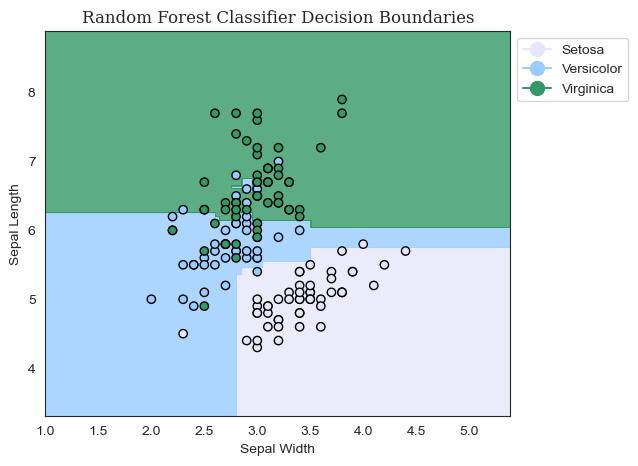

In [112]:
import matplotlib.colors as mcolors
custom_cmap = mcolors.ListedColormap(['#E6E6FA','#99CCFF','#339966'])

plt.figure(figsize = (6, 5))
plt.contourf(_x, _y, _z, alpha = 0.8, 
             cmap = custom_cmap)
plt.scatter(iris['Sepal.Width'], 
            iris['Sepal.Length'], 
            c = iris['label'], 
            edgecolors = 'k', 
            cmap = custom_cmap)
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

legend1 = plt.Line2D([0], [0], marker = 'o', color = '#E6E6FA', label = 'Setosa', 
                     markerfacecolor = '#E6E6FA', markersize = 10)
legend2 = plt.Line2D([0], [0], marker = 'o', color = '#99CCFF', label = 'Versicolor', 
                     markerfacecolor = '#99CCFF', markersize = 10)
legend3 = plt.Line2D([0], [0], marker = 'o', color = '#339966', label = 'Virginica', 
                     markerfacecolor = '#339966', markersize = 10)

plt.legend(handles = [legend1, legend2, legend3], 
           loc = 'upper left', 
           bbox_to_anchor = (1, 1))

plt.title('Random Forest Classifier Decision Boundaries',
          fontsize = 12,
          fontfamily = 'Serif')
plt.show()

Random Forest를 활용해 추정한 결과, Decision Boundary가 노드의 분기에 맞게 직선 형태로 분류된 모습을 볼 수 있다

Text(0.5, 1.0, 'MDI Feature Importance')

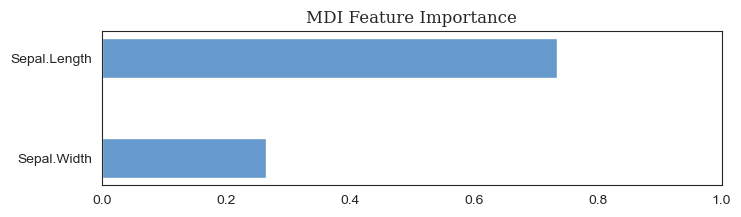

In [141]:
feature_importance_df = pd.DataFrame({'Feature': ['Sepal.Width', 'Sepal.Length'],
                                     'Importance': fit_classifier.feature_importances_})
plt.figure(figsize = (8,2))
plt.barh(feature_importance_df['Feature'], 
         feature_importance_df['Importance'], 
         color = '#6699CC',
         height = 0.4)
plt.xlim([0, 1])
plt.title('MDI Feature Importance', fontsize = 12, fontfamily = 'Serif')